<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="small_images.jpg" />

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

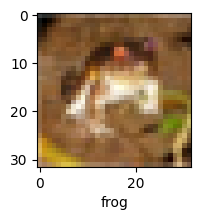

In [10]:
plot_sample(X_train, y_train, 0)

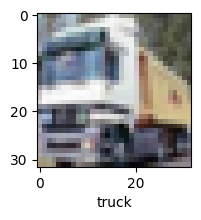

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1293/1563 [=======================>......] - ETA: 25s - loss: 1.8308 - accuracy: 0.3456

KeyboardInterrupt: 

**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.5340 - accuracy: 0.8136
Epoch 2/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.4965 - accuracy: 0.8241
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.4624 - accuracy: 0.8367
Epoch 4/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.4336 - accuracy: 0.8456
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.3995 - accuracy: 0.8577
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.3719 - accuracy: 0.8676
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.3403 - accuracy: 0.8783
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.3184 - accuracy: 0.8870
Epoch 9/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.2937 - accuracy: 0.8948
Epoch 10/10
1563/1563 [==============================] - 51s 33m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.3855 - accuracy: 0.6878


[1.385508418083191, 0.6877999901771545]

In [40]:
y_pred = cnn.predict(X_test)
y_pred

313/313 [==============================] - 4s 13ms/step


array([[2.9459079e-06, 2.1268454e-08, 7.1754461e-05, ..., 8.0229000e-07,
        4.8363735e-03, 2.0743846e-07],
       [7.5184170e-09, 4.2418498e-05, 9.8827798e-15, ..., 1.3712526e-19,
        9.9995750e-01, 3.8447956e-09],
       [1.7627753e-02, 9.0656750e-02, 2.8282007e-05, ..., 6.4583872e-07,
        8.8972211e-01, 1.9478357e-03],
       ...,
       [1.4491498e-12, 5.0587751e-15, 2.7752967e-04, ..., 1.0412972e-04,
        9.0258516e-14, 4.0107744e-12],
       [4.6388874e-12, 9.9999577e-01, 3.5999717e-10, ..., 2.4984217e-10,
        9.1670886e-11, 4.1823578e-06],
       [2.7469999e-13, 1.6873691e-09, 1.9952244e-08, ..., 9.9999708e-01,
        5.2649782e-14, 7.3609122e-12]], dtype=float32)

In [42]:
X_test.shape

(10000, 32, 32, 3)

In [41]:
y_pred.shape

(10000, 10)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

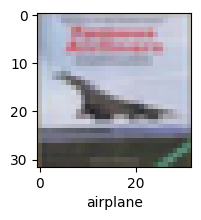

In [22]:
plot_sample(X_test, y_test,3)

In [23]:
classes[y_classes[3]]

'airplane'

In [24]:
classes[y_classes[3]]

'airplane'

In [31]:
from PIL import Image
import numpy as np
image = Image.open('airplane.jpg')

# Convert the image to a NumPy array
resized_image = image.resize((32, 32))
image_array = np.array(resized_image)

# Now you can work with the image array, for example, display its shape
print("Image shape:", image_array.shape)

Image shape: (32, 32, 3)


In [36]:
image_reshaped = np.expand_dims(image_array, axis=0)

# Now 'image_reshaped' has shape (1, 150, 150)
print("Reshaped image shape:", image_reshaped.shape)

Reshaped image shape: (1, 32, 32, 3)


In [38]:
predictions = cnn.predict(image_reshaped)

1/1 [==============================] - 0s 114ms/step


In [45]:
predictions

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [48]:
y_class = [np.argmax(element) for element in predictions]
y_class

[0]

In [49]:
cnn.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<h3 style='color:purple'>Exercise</h3>

Use CNN to do handwritten digits classification using MNIST dataset. You can use this notebook as a reference:
https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/1_digits_recognition/digits_recognition_neural_network.ipynb

Above we used ANN for digits classification. You need to modify this code to use CNN instead. Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. Once you have worked on this problem on your own, you can check my solution by clicking on this link: [Solution](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/16_cnn_cifar10_small_image_classification/cnn_mnist_exercise_solution.ipynb)